In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=25)
    return blank_img

def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

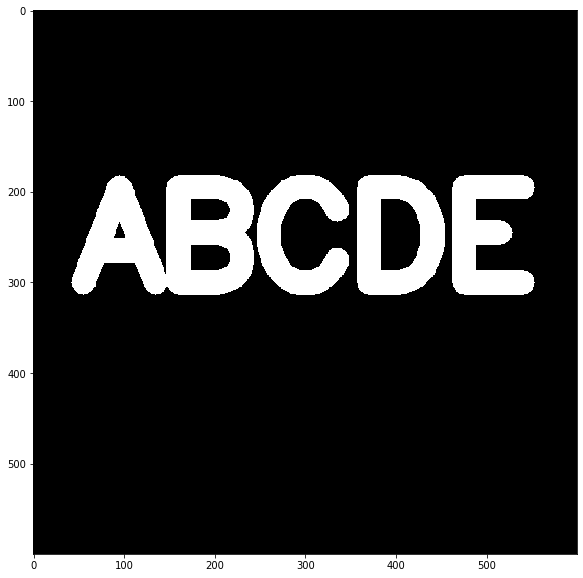

In [8]:
img = load_img()
display_img(img)

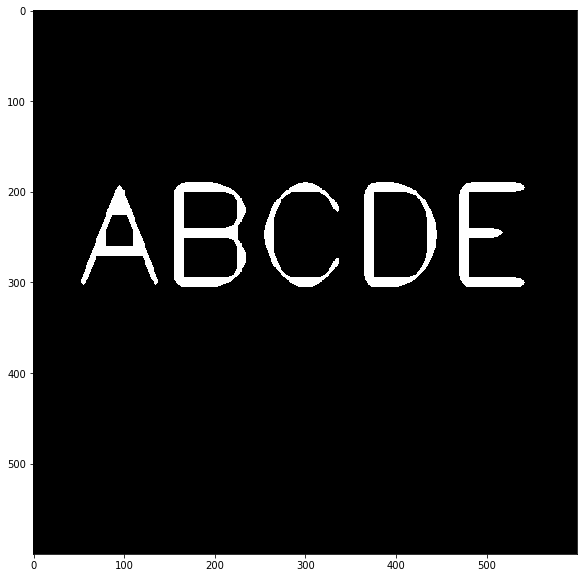

In [12]:
# Erosion
# Erodes the boundries of the foreground text

kernel = np.ones((5,5),np.uint8)
res = cv2.erode(img,kernel,iterations=4)
display_img(res)

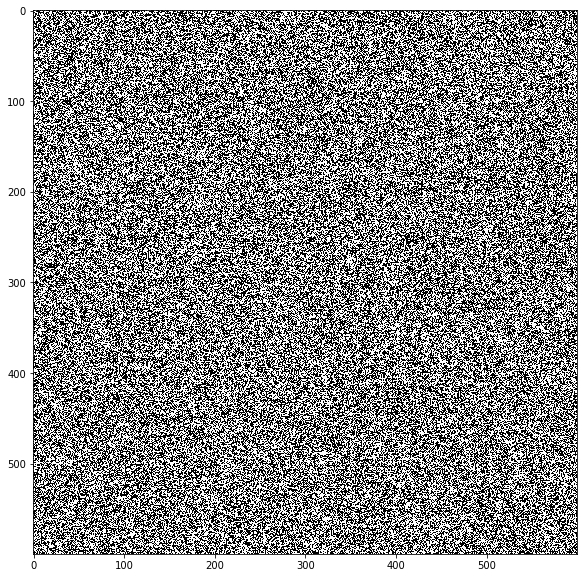

In [23]:
# Dilation is adding to the foreground boundary

img = load_img()
white_noise = np.random.randint(low=0,high=2,size=(600,600))
display_img(white_noise)
white_noise = white_noise * 255

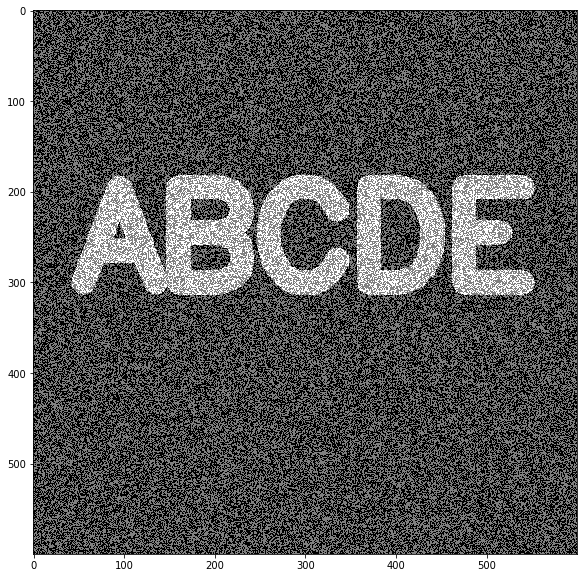

In [24]:
noise_img = white_noise + img
display_img(noise_img)

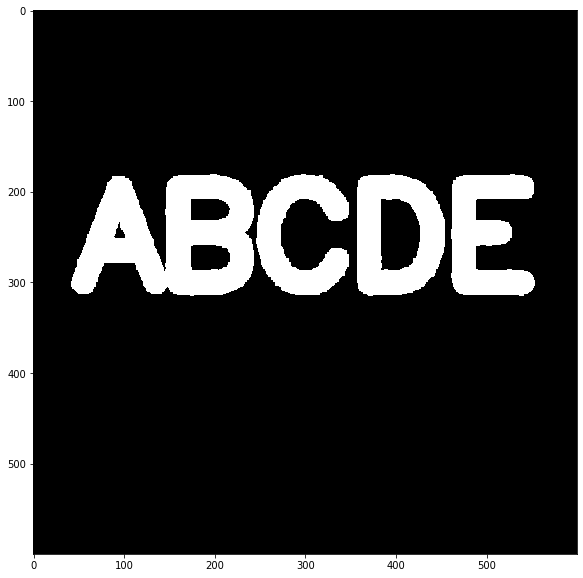

In [25]:
# Use Opening to get rid of noise
# Its erosion followed by dilation

opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
display_img(opening)

In [29]:
# Creating  an image with foreground noise

img = load_img()
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise *= -255

In [31]:
black_noise_img = img + black_noise
black_noise_img

array([[   0., -255.,    0., ..., -255.,    0.,    0.],
       [   0.,    0.,    0., ...,    0., -255.,    0.],
       [   0., -255.,    0., ..., -255.,    0., -255.],
       ...,
       [   0.,    0.,    0., ...,    0., -255.,    0.],
       [-255.,    0.,    0., ...,    0.,    0., -255.],
       [-255.,    0.,    0., ...,    0.,    0., -255.]])

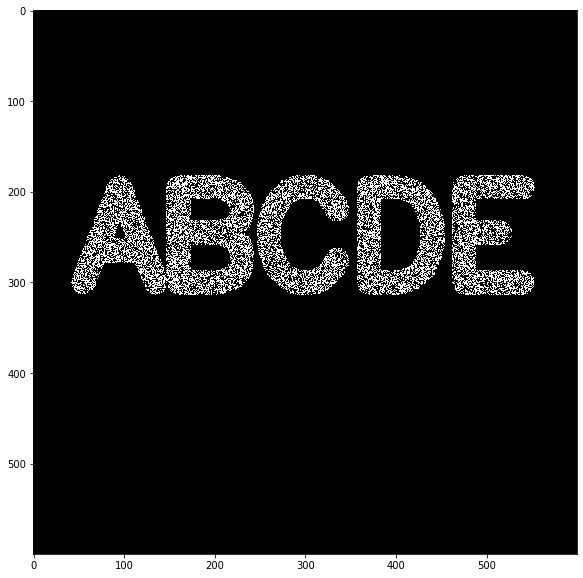

In [34]:
black_noise_img[black_noise_img==-255] = 0
display_img(black_noise_img)

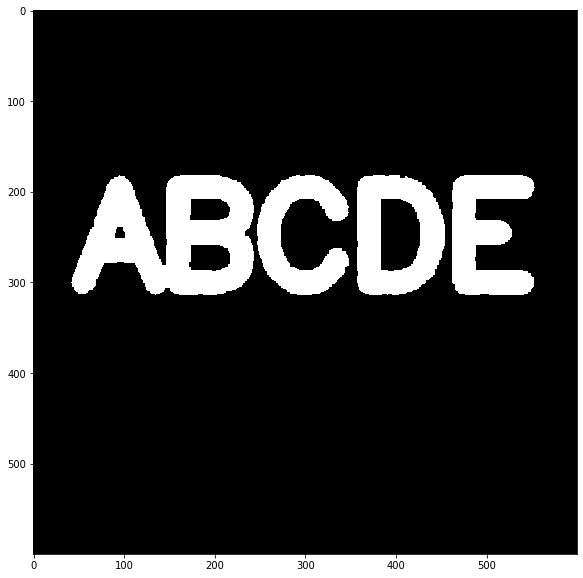

In [35]:
# Use closing for foreground noise

closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)
display_img(closing)

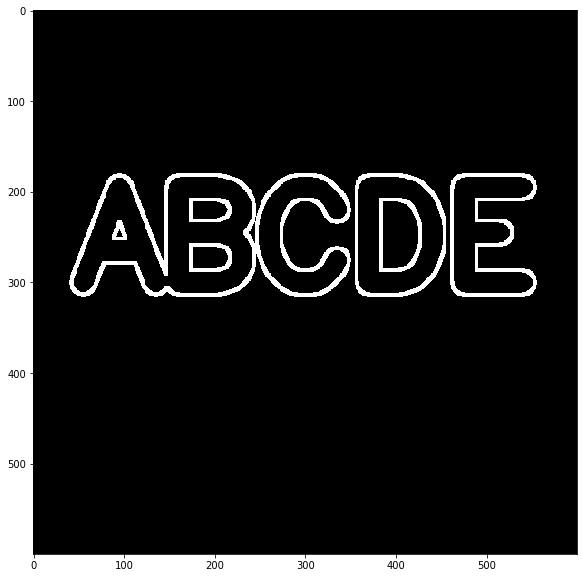

In [37]:
# morph gradient
# Takes difference of dilation and erosion
# Its kind of edge detection

img = load_img()
img = gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(img)